Teammates:
1. Prachi Goel
2. Lalita Arya

Steps involved in the project:
 1. Loading datasets
 2. Data Preparation and preprocessing
 3. Data Visualisation(for eg. AHT and AST Calculation trend)
 4. Feature Engineering
 5. Models build:GRU, CNN, LSTM
 6. Model Evaluation
 7. Some function for IVR(Interactive Voice Response Improvement) improvement

In [ ]:
import pandas as pd
import numpy as np

# Load historical call data (e.g., 'call_data.csv' with 'Date' and 'Call_Volume')
calls_data = pd.read_csv('/content/callsf0d4f5a.csv')
customers_data = pd.read_csv('/content/customers2afd6ea.csv')
reason_data = pd.read_csv('/content/reason18315ff.csv')
sentiment_data = pd.read_csv('/content/sentiment_statisticscc1e57a.csv')
test_data = pd.read_csv('/content/testbc7185d.csv')

In [ ]:
calls_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
sentiment_data

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [ ]:
reason_data

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [ ]:
customers_data

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [ ]:
test_data

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168
...,...
5152,5300201106
5153,727694488
5154,147487837
5155,5330794838


In [ ]:
calls_data.isnull().sum()
customers_data.isnull().sum()
sentiment_data.isnull().sum()
test_data.isnull().sum()
reason_data.isnull().sum()

,0
call_id,0
primary_call_reason,0


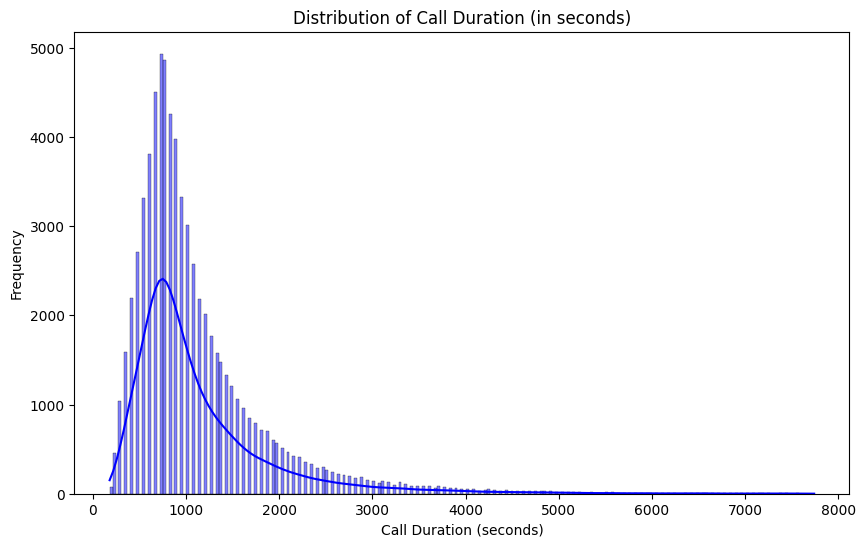

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Call Duration
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Call Duration'].dt.total_seconds(), kde=True, color='blue')
plt.title('Distribution of Call Duration (in seconds)')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-56-838ea4310b5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='agent_tone', data=sentiment_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

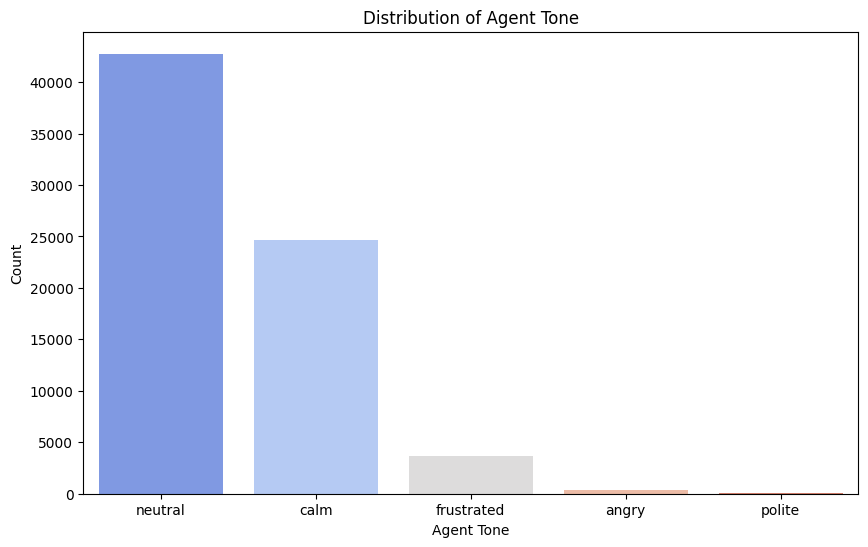

<ipython-input-56-838ea4310b5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_tone', data=sentiment_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

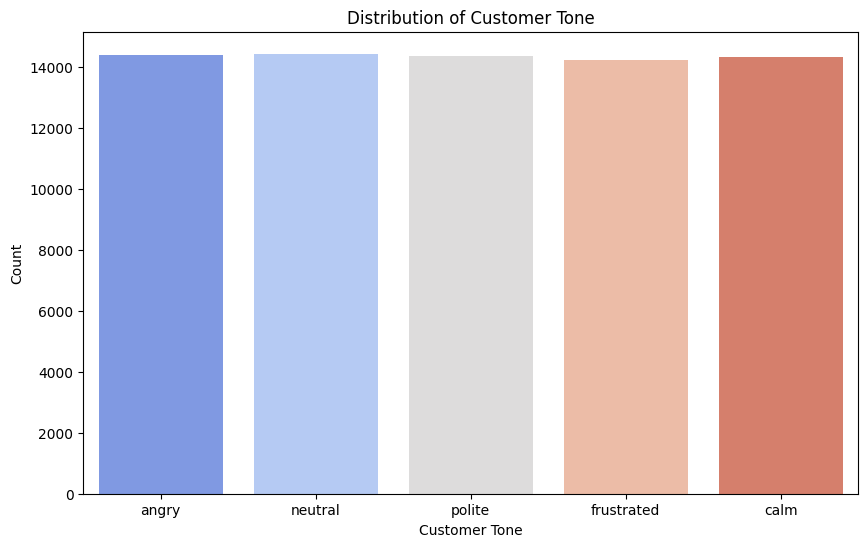

In [ ]:
# Distribution of Agent Tone
plt.figure(figsize=(10, 6))
sns.countplot(x='agent_tone', data=sentiment_data, palette='coolwarm')
plt.title('Distribution of Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Count')
plt.show()

# Distribution of Customer Tone
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_tone', data=sentiment_data, palette='coolwarm')
plt.title('Distribution of Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Count')
plt.show()


In [ ]:

# Convert datetime columns in calls_data
calls_data['call_start_datetime'] = pd.to_datetime(calls_data['call_start_datetime'])
calls_data['agent_assigned_datetime'] = pd.to_datetime(calls_data['agent_assigned_datetime'])
calls_data['call_end_datetime'] = pd.to_datetime(calls_data['call_end_datetime'])

# Calculate Call Duration, AST, and AHT
calls_data['Call Duration'] = calls_data['call_end_datetime'] - calls_data['call_start_datetime']
calls_data['AST'] = calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']
calls_data['AHT'] = calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']


In [ ]:
# Calculating AHT
aht = calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']
aht_avg = aht.mean()

# Calculating AST
ast = calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']
ast_avg = ast.mean()

print(f'Average Handle Time (AHT): {aht_avg}')
print(f'Average Speed to Answer (AST): {ast_avg}')

Average Handle Time (AHT): 0 days 00:11:37.048600473
Average Speed to Answer (AST): 0 days 00:07:17.067539339


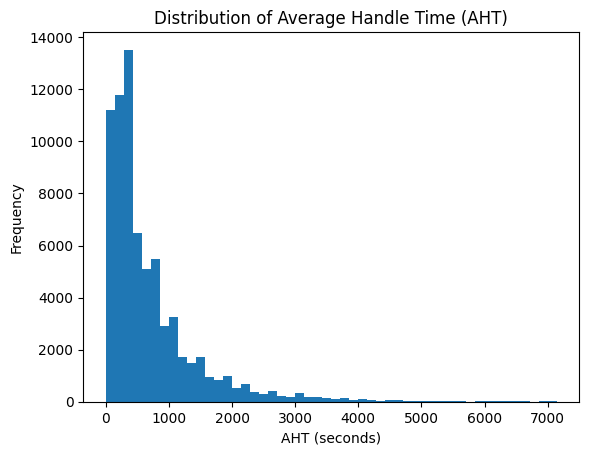

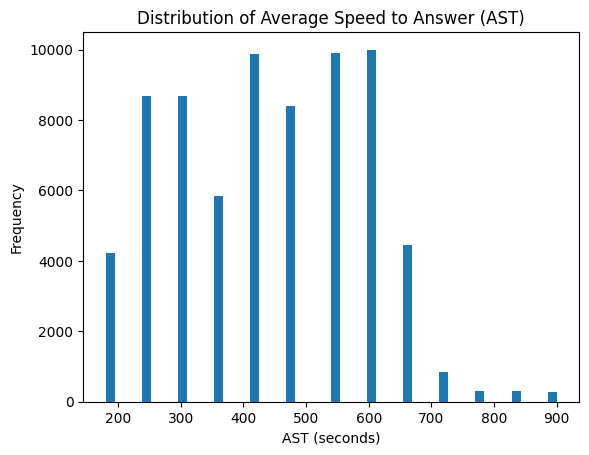

In [ ]:
import matplotlib.pyplot as plt
# Analyzing the distribution of AHT and AST

# Converting Timedelta objects to numeric values (e.g., seconds)
aht_seconds = aht.dt.total_seconds()
ast_seconds = ast.dt.total_seconds()

plt.hist(aht_seconds, bins=50)
plt.title('Distribution of Average Handle Time (AHT)')
plt.xlabel('AHT (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.hist(ast_seconds, bins=50)
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('AST (seconds)')
plt.ylabel('Frequency')
plt.show()

                call_id  customer_id  agent_id  Call Duration       AST  \
call_id        1.000000    -0.002907 -0.001021      -0.005216 -0.001266   
customer_id   -0.002907     1.000000 -0.001942      -0.001771 -0.000648   
agent_id      -0.001021    -0.001942  1.000000       0.001329 -0.000426   
Call Duration -0.005216    -0.001771  0.001329       1.000000  0.165169   
AST           -0.001266    -0.000648 -0.000426       0.165169  1.000000   
AHT           -0.005040    -0.001668  0.001431       0.981297 -0.027778   

                    AHT  
call_id       -0.005040  
customer_id   -0.001668  
agent_id       0.001431  
Call Duration  0.981297  
AST           -0.027778  
AHT            1.000000  


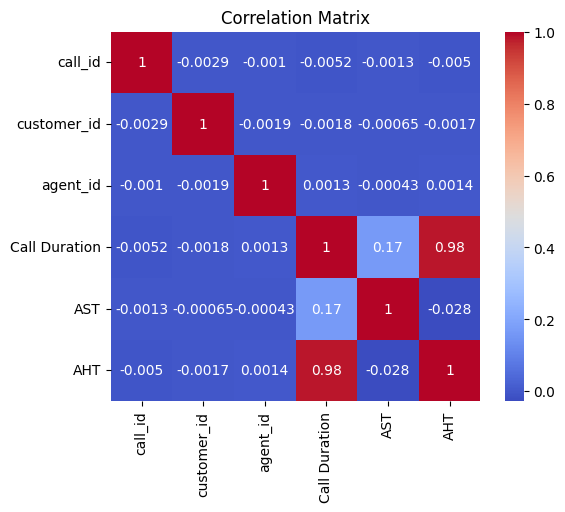

In [ ]:
# The correlation between AHT and AST with other variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting only numeric columns for correlation analysis
numeric_calls_df = calls_data.select_dtypes(include=['number'])

# Calculating correlation matrix for numeric columns
corr_matrix = numeric_calls_df.corr()
print(corr_matrix)


# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


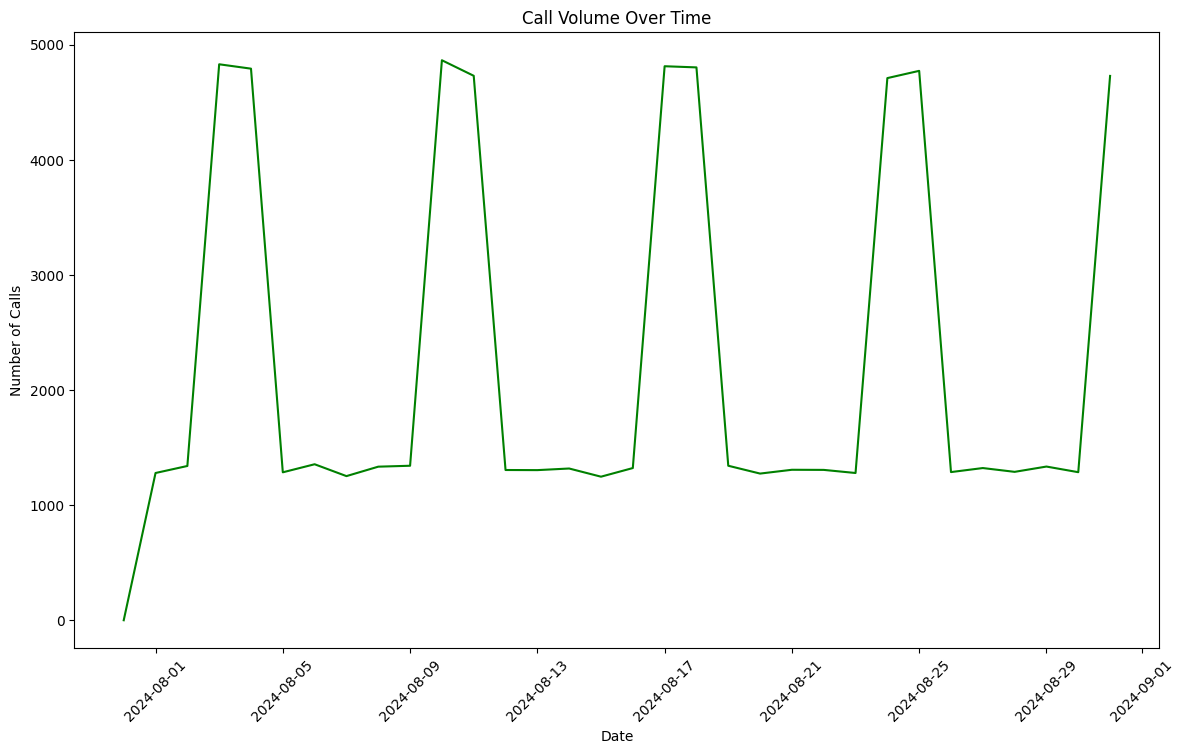

In [ ]:
# Calls Over Time
plt.figure(figsize=(14, 8))
calls_per_day = calls_data.groupby(calls_data['call_start_datetime'].dt.date).size()
plt.plot(calls_per_day, color='green')
plt.title('Call Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Merged datasets on call_id
merged_data = calls_data.merge(sentiment_data[['call_id', 'average_sentiment', 'silence_percent_average']], on='call_id', how='left')
merged_data = merged_data.merge(reason_data, on='call_id', how='left')
merged_data = merged_data.merge(customers_data, on='customer_id', how='left')

In [ ]:
 #Converting the tones to numeric values
tone_mapping = {
    'calm': 1,
    'neutral': 0,
    'angry': -1,
    'frustrated': -1,
    'polite': 1
}

# Map tones to numeric values
sentiment_data['agent_tone_numeric'] = sentiment_data['agent_tone'].map(tone_mapping).fillna(0)
sentiment_data['customer_tone_numeric'] = sentiment_data['customer_tone'].map(tone_mapping).fillna(0)

# Creating overall sentiment score
sentiment_data['overall_sentiment'] = (
    sentiment_data['average_sentiment'] +
    sentiment_data['agent_tone_numeric'] +
    sentiment_data['customer_tone_numeric']
) / 3  # Averaging the three sentiment values

# Merged datasets on call_id
merged_data = calls_data.merge(
    sentiment_data[['call_id', 'overall_sentiment', 'silence_percent_average']],
    on='call_id',
    how='left'
)
merged_data = merged_data.merge(reason_data, on='call_id', how='left')
merged_data = merged_data.merge(customers_data, on='customer_id', how='left')



In [ ]:
# Identifing the top reasons for calls and their corresponding AHT and AST
top_reasons = reason_data['primary_call_reason'].value_counts().head(10)
print(top_reasons)

aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].mean()
print(aht_by_reason)

ast_by_reason = merged_data.groupby('primary_call_reason')['AST'].mean()
print(ast_by_reason)

primary_call_reason
IRROPS                   13057
Voluntary Change         10291
Seating                   6223
Mileage Plus              5487
Post-Flight               3869
Communications            3779
Products and Services     2792
Upgrade                   2682
Baggage                   2616
Booking                   2589
Name: count, dtype: int64
primary_call_reason
 Baggage                  0 days 00:05:29.302325581
Baggage                   0 days 00:05:34.449541284
Baggage                   0 days 00:05:20.307692307
Booking                   0 days 00:07:05.701042873
Booking                      0 days 00:08:57.500000
Check In                  0 days 00:09:15.272727272
Check-In                  0 days 00:09:36.281879194
Check-In                  0 days 00:11:53.793103448
Checkout                  0 days 00:16:48.358695652
Checkout                     0 days 00:22:22.500000
Communications            0 days 00:13:46.853664990
Communications            0 days 00:13:38.360655737


In [ ]:
merged_data

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Call Duration,AST,AHT,overall_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:38:00,0 days 00:07:00,0 days 00:31:00,-0.346667,0.39,Voluntary Cancel,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:15:00,0 days 00:03:00,0 days 00:12:00,0.340000,0.35,Booking,Tammy Walters,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:27:00,0 days 00:08:00,0 days 00:19:00,0.290000,0.32,IRROPS,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,0 days 00:05:00,0 days 00:07:00,-0.400000,0.20,Upgrade,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,0 days 00:10:00,0 days 00:09:00,0.316667,0.35,Seating,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:37:00,0 days 00:09:00,0 days 00:28:00,0.683333,0.34,Post Flight,Dennis Singleton DDS,NaN
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:11:00,0 days 00:03:00,0 days 00:08:00,0.010000,0.22,Upgrade,Paul Mitchell,1.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,0 days 00:06:00,0 days 00:06:00,0.683333,0.42,Upgrade,Kaylee Lang,NaN
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,0 days 00:06:00,0 days 00:04:00,0.310000,0.13,NaN,Christine Oneal,1.0


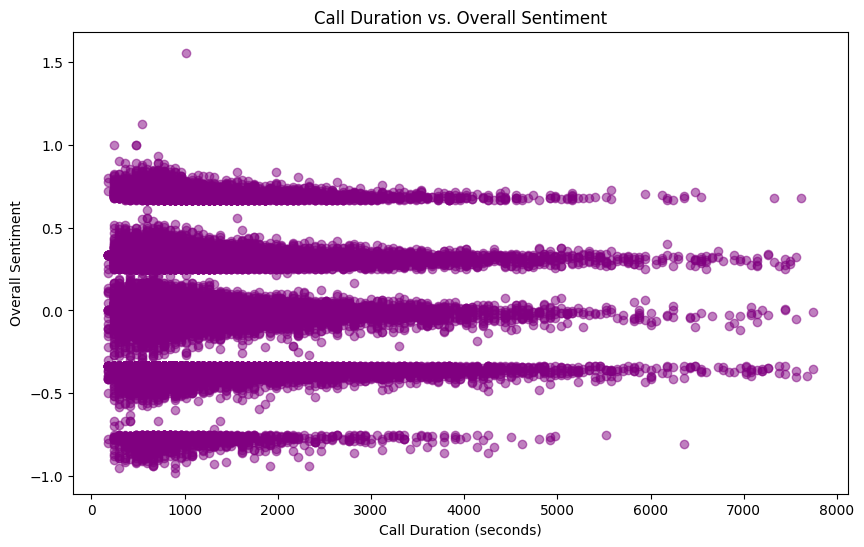

In [ ]:
# Scatterplot visualization for Overall Sentiment vs Call Duration
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Call Duration'].dt.total_seconds(), merged_data['overall_sentiment'], alpha=0.5, color='purple')
plt.title('Call Duration vs. Overall Sentiment')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Overall Sentiment')
plt.show()


<ipython-input-40-70883866bdc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='elite_level_code', data=merged_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

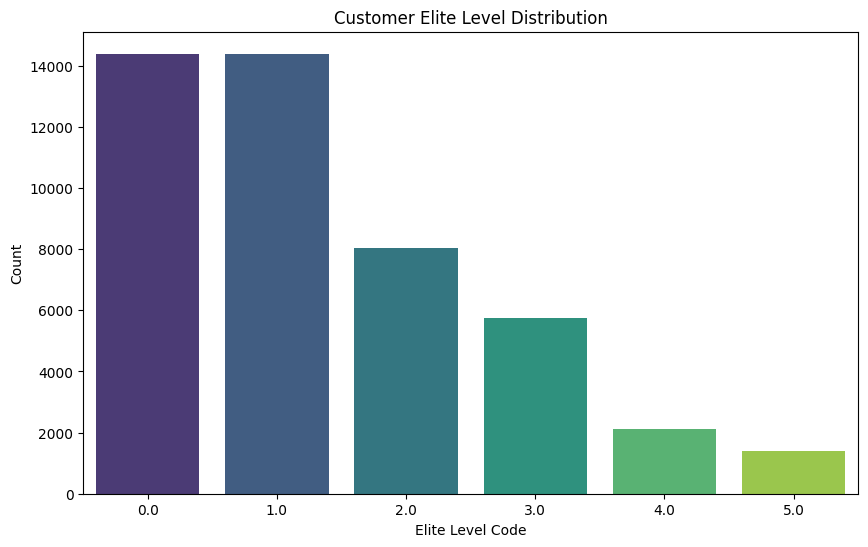

In [ ]:
# Distribution of Customer Elite Level
plt.figure(figsize=(10, 6))
sns.countplot(x='elite_level_code', data=merged_data, palette='viridis')
plt.title('Customer Elite Level Distribution')
plt.xlabel('Elite Level Code')
plt.ylabel('Count')
plt.show()


In [ ]:
# Categorizing time of day based on call_start_datetime
def categorize_time_of_day(datetime):
    hour = datetime.hour
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

merged_data['time_of_day'] = merged_data['call_start_datetime'].apply(categorize_time_of_day)

<ipython-input-46-0fee65e3381c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time_of_day', data=merged_data, palette='plasma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

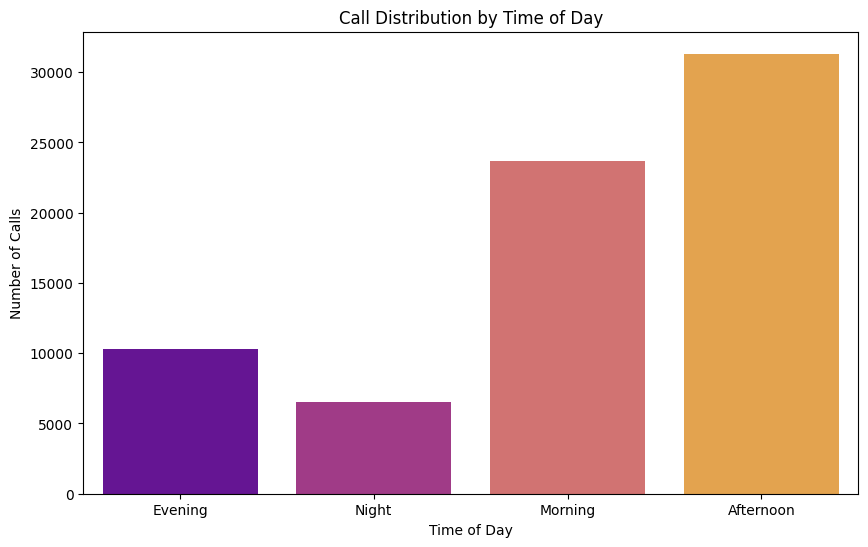

In [ ]:
# Time of Day Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', data=merged_data, palette='plasma')
plt.title('Call Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Calls')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding Categorical Variables
# Encoding agent_tone and customer_tone
tone_encoder = LabelEncoder()
merged_data['agent_tone_encoded'] = tone_encoder.fit_transform(sentiment_data['agent_tone'].fillna('unknown'))
merged_data['customer_tone_encoded'] = tone_encoder.fit_transform(sentiment_data['customer_tone'].fillna('unknown'))


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-Hot Encoding for primary_call_reason
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
call_reason_encoded = one_hot_encoder.fit_transform(merged_data[['primary_call_reason']])
call_reason_df = pd.DataFrame(call_reason_encoded, columns=one_hot_encoder.get_feature_names_out(['primary_call_reason']))


In [ ]:
# Limiting One-Hot Encoding to top N categories
top_n = 10  # Set how many top categories to keep

# Get top N frequent categories
top_categories = merged_data['customer_name'].value_counts().index[:top_n]

# Creating a new column where less frequent categories are grouped as 'Other'
merged_data['customer_name_limited'] = merged_data['customer_name'].apply(lambda x: x if x in top_categories else 'Other')

# One-Hot Encoding for the limited customer_name column
customer_name_encoded = one_hot_encoder.fit_transform(merged_data[['customer_name_limited']])
customer_name_df = pd.DataFrame(customer_name_encoded, columns=one_hot_encoder.get_feature_names_out(['customer_name_limited']))

# Concatenate with merged_data
merged_data = pd.concat([merged_data, customer_name_df], axis=1)



In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype          
---  ------                                  --------------  -----          
 0   call_id                                 71810 non-null  int64          
 1   customer_id                             71810 non-null  int64          
 2   agent_id                                71810 non-null  int64          
 3   call_start_datetime                     71810 non-null  datetime64[ns] 
 4   agent_assigned_datetime                 71810 non-null  datetime64[ns] 
 5   call_end_datetime                       71810 non-null  datetime64[ns] 
 6   call_transcript                         71810 non-null  object         
 7   Call Duration                           71810 non-null  timedelta64[ns]
 8   AST                                     71810 non-null  timedelta64[ns]
 9   AHT                                    

In [ ]:
# Drop original categorical columns that have been encoded
merged_data = merged_data.drop(columns=['agent_tone_encoded', 'customer_tone_encoded', 'primary_call_reason', 'customer_name'])


In [ ]:
import numpy as np;
n_chunks = 5

# Spliting the merged_data DataFrame into n_chunks
data_chunks = np.array_split(merged_data, n_chunks)

# To access each chunk, the iteration or reference by index
for i, chunk in enumerate(data_chunks):
    print(f"Chunk {i + 1}:")
    print(chunk)

Chunk 1:
          call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118 2024-07-31 23:56:00   
1      1122072124   8186702651    519057 2024-08-01 00:03:00   
2      6834291559   2416856629    158319 2024-07-31 23:59:00   
3      2266439882   1154544516    488324 2024-08-01 00:05:00   
4      1211603231   5214456437    721730 2024-08-01 00:04:00   
...           ...          ...       ...                 ...   
14357  5285217944   1018043282    686999 2024-08-06 14:28:00   
14358  9640996018   4948316410    931734 2024-08-06 14:24:00   
14359   679502840   4874735960    347606 2024-08-06 14:31:00   
14360  5666285552    699600890    880532 2024-08-06 14:26:00   
14361  7894390270   4163664246    309976 2024-08-06 14:27:00   

      agent_assigned_datetime   call_end_datetime  \
0         2024-08-01 00:03:00 2024-08-01 00:34:00   
1         2024-08-01 00:06:00 2024-08-01 00:18:00   
2         2024-08-01 00:07:00 2024-08-01 00:26:00   
3         

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Tokenization and Vectorization of call_transcript using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
if 'call_transcript' in merged_data.columns:
    # Tokenization for LSTM
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(merged_data['call_transcript'].fillna(''))
    sequences = tokenizer.texts_to_sequences(merged_data['call_transcript'].fillna(''))

    # Padding sequences to ensure uniform input size
    max_length = max(len(x) for x in sequences)  # Get max length of sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

    # Create a DataFrame for the TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Adjust max_features as necessary
    transcript_vectors = tfidf_vectorizer.fit_transform(merged_data['call_transcript'].fillna('')).toarray()

    # Create a DataFrame for the TF-IDF features
    transcript_df = pd.DataFrame(transcript_vectors, columns=tfidf_vectorizer.get_feature_names_out())

    # Concatenate the TF-IDF DataFrame with merged_data
    merged_data = pd.concat([merged_data.reset_index(drop=True), transcript_df.reset_index(drop=True)], axis=1)

    # Drop original transcript column
    merged_data = merged_data.drop(columns=['call_transcript'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 756s 419ms/step - accuracy: 0.6895 - loss: 0.5982 - val_accuracy: 0.7249 - val_loss: 0.5510
Epoch 2/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 807s 422ms/step - accuracy: 0.7431 - loss: 0.5212 - val_accuracy: 0.7281 - val_loss: 0.5482
Epoch 3/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 788s 415ms/step - accuracy: 0.7763 - loss: 0.4515 - val_accuracy: 0.7184 - val_loss: 0.5773
Epoch 4/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 803s 415ms/step - accuracy: 0.8324 - loss: 0.3596 - val_accuracy: 0.7019 - val_loss: 0.6505
Epoch 5/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 747s 416ms/step - accuracy: 0.8816 - loss: 0.2745 - val_accuracy: 0.6818 - val_loss: 0.7211
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.6803 - loss: 0.7384
Test Accuracy: 0.68


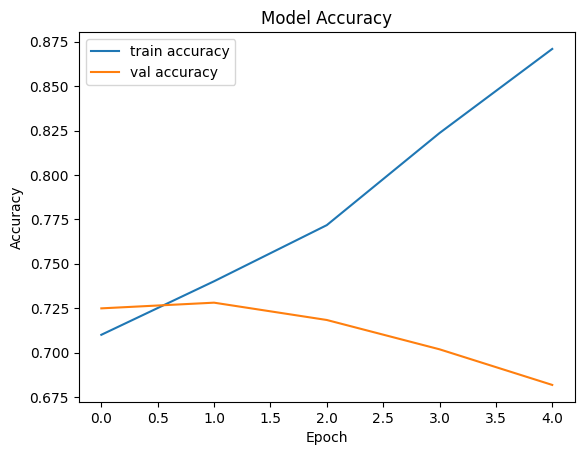

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten

# Prepare target variable and features for CNN
# Assuming you want to predict overall sentiment (binary classification example)
X = padded_sequences
y = (merged_data['overall_sentiment'] > 0).astype(int)  # Binary target for simplicity

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the CNN Model
model = Sequential()

# Embedding Layer (Word Embeddings)
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))  # 128-dimensional embeddings

# Convolutional Layer (CNN for feature extraction)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # 128 filters, kernel size 5
model.add(MaxPooling1D(pool_size=2))  # Pooling layer to reduce dimensionality

# Flatten the output from Conv1D + MaxPooling
model.add(Flatten())

# Dropout for regularization
model.add(Dropout(0.5))

# Fully connected layer for classification
model.add(Dense(64, activation='relu'))

# Output Layer (Binary classification)
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# visualizing the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1315s 729ms/step - accuracy: 0.5817 - loss: 0.6812 - val_accuracy: 0.5855 - val_loss: 0.6785
Epoch 2/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1270s 689ms/step - accuracy: 0.5819 - loss: 0.6806 - val_accuracy: 0.5855 - val_loss: 0.6786
Epoch 3/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1249s 695ms/step - accuracy: 0.5816 - loss: 0.6805 - val_accuracy: 0.5855 - val_loss: 0.6785
Epoch 4/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1239s 690ms/step - accuracy: 0.5822 - loss: 0.6801 - val_accuracy: 0.5855 - val_loss: 0.6786
Epoch 5/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1295s 697ms/step - accuracy: 0.5834 - loss: 0.6796 - val_accuracy: 0.5855 - val_loss: 0.6789
449/449 ━━━━━━━━━━━━━━━━━━━━ 57s 126ms/step - accuracy: 0.5881 - loss: 0.6781
Test Accuracy: 0.59


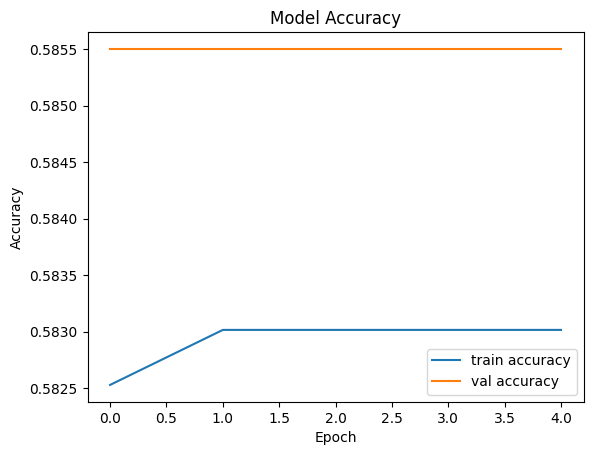

In [ ]:
# Importing necessary modules from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

# Preparing target variable and features for GRU
# we want to predict overall sentiment (binary classification example)
X = padded_sequences
y = (merged_data['overall_sentiment'] > 0).astype(int)  # Binary target for simplicity

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GRU Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))  # 128-dimensional embeddings
model.add(GRU(64, return_sequences=False))  # Replace LSTM with GRU
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# visualizing the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1146s 633ms/step - accuracy: 0.5795 - loss: 0.6821 - val_accuracy: 0.5855 - val_loss: 0.6785
Epoch 2/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1152s 641ms/step - accuracy: 0.5851 - loss: 0.6793 - val_accuracy: 0.5855 - val_loss: 0.6787
Epoch 3/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1160s 640ms/step - accuracy: 0.5893 - loss: 0.6779 - val_accuracy: 0.5855 - val_loss: 0.6786
Epoch 4/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1156s 644ms/step - accuracy: 0.5849 - loss: 0.6792 - val_accuracy: 0.5855 - val_loss: 0.6787
Epoch 5/5
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 1155s 643ms/step - accuracy: 0.5825 - loss: 0.6795 - val_accuracy: 0.5855 - val_loss: 0.6785
449/449 ━━━━━━━━━━━━━━━━━━━━ 60s 133ms/step - accuracy: 0.5881 - loss: 0.6776
Test Accuracy: 0.59


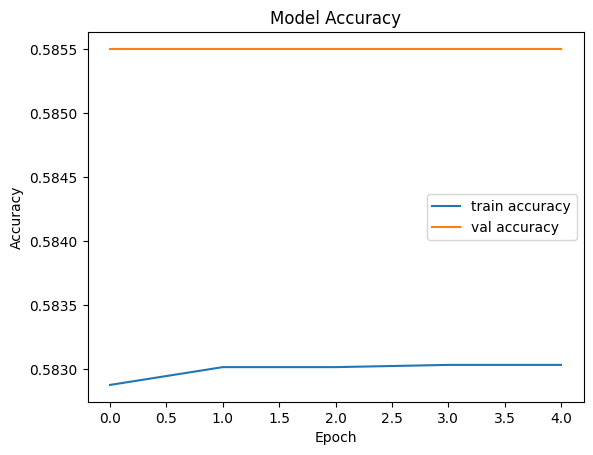

In [ ]:
# Import necessary modules from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

# Preparing the target variable and features for LSTM
# we want to predict overall sentiment (binary classification example)
X = padded_sequences
y = (merged_data['overall_sentiment'] > 0).astype(int)  # Binary target for simplicity

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))  # 128-dimensional embeddings
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Visualizing the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
#Enhanced Sentiment Analysis for Real-Time Response
def predict_real_time_sentiment(customer_tone, agent_tone, silence_percent):
    # Adjusting thresholds for a real-time system
    overall_sentiment = (customer_tone + agent_tone + silence_percent) / 3
    if overall_sentiment < -0.1:
        return "Escalate"
    else:
        return "No Escalation"


In [ ]:
#Enhanced Sentiment Analysis for Real-Time Response
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = merged_data[['overall_sentiment', 'Call Duration']].fillna(0)

# Converting 'Call Duration' to total seconds (numeric)
X['Call Duration'] = X['Call Duration'].dt.total_seconds()

y = merged_data['agent_id']  # Target: which agent was successful for the call

# Training a RandomForestClassifier to predict the agent
agent_model = RandomForestClassifier()
agent_model.fit(X, y)

def assign_best_agent(call_data):
    # Ensure call_data['Call Duration'] is also in total seconds
    if isinstance(call_data['Call Duration'], pd.Timedelta):
        call_data['Call Duration'] = call_data['Call Duration'].total_seconds()

    prediction = agent_model.predict([call_data])
    return prediction[0]  # Returns agent ID

In [ ]:
#Advanced Customer Prioritization
def get_customer_insights(customer_id):
    customer_info = merged_data[merged_data['customer_id'] == customer_id]
    recent_calls = customer_info[['call_start_datetime', 'overall_sentiment']].tail(3)
    return recent_calls


In [ ]:
#Proactive Customer Support
def trigger_proactive_call(customer_id):
    customer_data = merged_data[merged_data['customer_id'] == customer_id]
    # If recent calls have been negative, trigger a proactive support call
    if customer_data['overall_sentiment'].mean() < 0:
        print("Proactive support needed for customer:", customer_id)


In [ ]:
#Personalized IVR Options
def personalize_menu(customer_id):
    call_reason = merged_data[merged_data['customer_id'] == customer_id]['primary_call_reason'].mode()[0]
    return f"Welcome back! It looks like you previously called about {call_reason}. How can we assist you today?"


In [ ]:
#Better Feedback Collection & Analysis
def send_post_call_survey(customer_id, call_id):
    # After the call ends, automatically send a survey request
    print(f"Sending post-call survey to customer {customer_id} for call {call_id}")
